In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import diffxpy.api as de
import os

In [2]:
files = os.listdir("./H5ADfiles/")

In [3]:
files

['AnnData_GTEx_v10_Adipose - Subcutaneous.h5ad',
 'AnnData_GTEx_v10_Adipose - Visceral (Omentum).h5ad',
 'AnnData_GTEx_v10_Adrenal Gland.h5ad',
 'AnnData_GTEx_v10_Artery - Aorta.h5ad',
 'AnnData_GTEx_v10_Artery - Coronary.h5ad',
 'AnnData_GTEx_v10_Artery - Pulmonary.h5ad',
 'AnnData_GTEx_v10_Artery - Tibial.h5ad',
 'AnnData_GTEx_v10_Bladder.h5ad',
 'AnnData_GTEx_v10_Brain - Amygdala.h5ad',
 'AnnData_GTEx_v10_Brain - Anterior cingulate cortex (BA24).h5ad',
 'AnnData_GTEx_v10_Brain - Caudate (basal ganglia).h5ad',
 'AnnData_GTEx_v10_Brain - Cerebellar Hemisphere.h5ad',
 'AnnData_GTEx_v10_Brain - Cerebellum.h5ad',
 'AnnData_GTEx_v10_Brain - Cortex.h5ad',
 'AnnData_GTEx_v10_Brain - Frontal Cortex (BA9).h5ad',
 'AnnData_GTEx_v10_Brain - Hippocampus.h5ad',
 'AnnData_GTEx_v10_Brain - Hypothalamus.h5ad',
 'AnnData_GTEx_v10_Brain - Nucleus accumbens (basal ganglia).h5ad',
 'AnnData_GTEx_v10_Brain - Putamen (basal ganglia).h5ad',
 'AnnData_GTEx_v10_Brain - Spinal cord (cervical c-1).h5ad',
 'Ann

'Stomach - Mixed Cell',“胃-混合细胞”，
 'Adrenal Gland',“肾上腺”，
 'Cells - Leukemia cell line (CML)',“细胞-白血病细胞系（CML）”，
 'Brain - Hippocampus',“大脑-海马”，
 'Artery - Aorta',“动脉-主动脉”，
 'Stomach - Mucosa',“胃-粘膜”，
 'Esophagus - Muscularis',“食道-肌突”，
 'Brain - Putamen (basal ganglia)',“脑-Putamen（基底神经节）”，
 'Brain - Nucleus accumbens (basal ganglia)',“脑-伏隔核（基底节）”，
 'Liver - Portal Tract',“肝脏-门静脉道”，
 'Brain - Amygdala',“大脑-杏仁核”，
 'Pancreas - Islets',“胰腺岛”，
 'Stomach - Muscularis',“胃-肌肉”，
 'Kidney - Medulla',“肾-髓质”，
 'Artery - Tibial',“胫骨动脉”，
 'Minor Salivary Gland',“小唾液腺”，
 'Cells - Cultured fibroblasts', “细胞-培养的成纤维细胞”，
 'Thyroid',“甲状腺”，
 'Nerve - Tibial',“胫骨神经”，
 'Esophagus - Gastroesophageal Junction',“食管-胃食管交界处”，
 'Testis',“睾丸”，
 'Brain - Cerebellum',“大脑-小脑”，
 'Esophagus - Mucosa',“食管-粘膜”，
 'Spleen',“脾脏”，
 'Adipose - Subcutaneous',“皮下脂肪”，
 'Heart - Left Ventricle',“心脏-左心室”，
 'Colon - Transverse',“结肠横切面”，
 'Small Intestine - Terminal Ileum',“小肠-末端回肠”，
 'Prostate',“前列腺”，
 'Artery - Coronary',“冠状动脉”，
 'Liver',“肝脏”，
 'Cervix - Endocervix',“宫颈-子宫内膜”，
 'Pancreas',“胰腺”，
 'Brain - Caudate (basal ganglia)',“脑尾节（基底节）”，
 'Lung',“肺”，
 'Brain - Spinal cord (cervical c-1)',“脑-脊髓（颈c-1）”，
 'Brain - Frontal Cortex (BA9)',“大脑-额叶皮层（BA9）”，
 'Brain - Anterior cingulate cortex (BA24)',“大脑-前扣带皮层（BA24）”，
 'Adipose - Visceral (Omentum)',“脂肪-内脏（Omentum）”，
 'Small Intestine - Terminal Ileum - Mixed Cell',“小肠-末端回肠-混合细胞”，
 'Fallopian Tube',“输卵管”，
 'Breast - Mammary Tissue',“乳腺-乳腺组织”，
 'Muscle - Skeletal',“肌肉-骨骼”，
 'Vagina',“阴道”，
 'Bladder',“膀胱”，
 'Artery - Pulmonary',“动脉-肺动脉”，
 'Pituitary',“垂体”，
 'Colon - Transverse - Mixed Cell',“结肠-横向-混合细胞”，
 'Pancreas - Mixed Cell',“胰腺-混合细胞”，
 'Cervix - Ectocervix',“宫颈-外宫颈”，
 'Brain - Substantia nigra',“脑-黑质”，
 'Colon - Transverse - Muscularis','结肠-横肌'，
 'Cells - EBV-transformed lymphocytes',“细胞-EBV转化的淋巴细胞”，
 'Skin - Sun Exposed (Lower leg)',“皮肤-暴露在阳光下（小腿）”，
 'Kidney - Cortex',“肾-皮质”，
 'Brain - Hypothalamus',“大脑-下丘脑”，
 'Stomach',“胃”，
 'Uterus',“子宫”，
 'Heart - Atrial Appendage',“心脏-心房附件”，
 'Liver - Mixed Cell',“肝脏-混合细胞”，
 'Small Intestine - Terminal Ileum - Lymphoid Aggregate',“小肠-末端回肠-淋巴聚集体”，
 'Ovary',“卵巢”，
 'Colon - Sigmoid',“结肠-乙状结肠”，
 'Colon - Transverse - Mucosa',“结肠-横向-粘膜”，
 'Pancreas - Acini',“胰腺-阿西尼”，
 'Whole Blood',“全血”，
 'Brain - Cortex',“大脑皮层”，
 'Brain - Cerebellar Hemisphere',“大脑-小脑半球”，
 'Liver - Hepatocyte',“肝-肝细胞”，
 'Skin - Not Sun Exposed (Suprapubic)'“皮肤-不暴露在阳光下（耻骨上）”

In [4]:
Remove = []
TgoodID = []
for i in open("./OUTPUT/Testis_Tgood_ID.txt","r").readlines():
    TgoodID.append(i.strip())

TpoorID = []
for i in open("./OUTPUT/Testis_Tpoor_ID.txt","r").readlines():
    TpoorID.append(i.strip())

print("There are "+str(len(TgoodID))+" subjects in Group A.")
print("There are "+str(len(TpoorID))+" subjects in Group B.\n")

There are 146 subjects in Group A.
There are 183 subjects in Group B.



In [5]:
#myTissues = ['AnnData_GTEx_v10_Adrenal Gland.h5ad', 'AnnData_GTEx_v10_Brain - Hypothalamus.h5ad', 'AnnData_GTEx_v10_Pituitary.h5ad']
myTissues = ['AnnData_GTEx_v10_Brain - Hypothalamus.h5ad', 'AnnData_GTEx_v10_Pituitary.h5ad','AnnData_GTEx_v10_Adrenal Gland.h5ad']
myTissues = ['AnnData_GTEx_v10_Brain - Hypothalamus.h5ad','AnnData_GTEx_v10_Adrenal Gland.h5ad', 'AnnData_GTEx_v10_Pituitary.h5ad']
myTissues = ['AnnData_GTEx_v10_Brain - Hypothalamus.h5ad', 'AnnData_GTEx_v10_Pituitary.h5ad']
myTissues = ['AnnData_GTEx_v10_Pituitary.h5ad','AnnData_GTEx_v10_Brain - Hypothalamus.h5ad']
myTissues = myTissues + ['AnnData_GTEx_v10_Testis.h5ad']

In [6]:
GroupG_SubjIDs = set(TgoodID)
GroupP_SubjIDs = set(TpoorID)
UsedTis = []
NonUsedTis = []

for file in myTissues:
    if file.count("AnnData_GTEx_v10_") == 1 and file.count(".h5ad") == 1:
        if file not in Remove:
            print(file)
            myadata = 0
            myadata = sc.read("./H5ADfiles/"+file)
            AllID = myadata.obs.SUBJID.to_list()
            TmpA = GroupG_SubjIDs.intersection(set(AllID))
            TmpB = GroupP_SubjIDs.intersection(set(AllID))
            if min([len(TmpA),len(TmpB)]) < 5:
                print("$Group TestisGood subject numbers now is: "+str(len(list(TmpA)))+".")
                print("$Group TestisPoor subject numbers now is: "+str(len(list(TmpB)))+".")
                print("$ "+file+" is removed.\n")
                NonUsedTis.append(file)
            else:
                UsedTis.append(file)
                GroupG_SubjIDs = GroupG_SubjIDs.intersection(set(AllID))
                GroupP_SubjIDs = GroupP_SubjIDs.intersection(set(AllID))
                print("&&&&&&Group TestisGood subject numbers now is: "+str(len(list(GroupG_SubjIDs)))+".")
                print("&&&&&&Group TestisPoor subject numbers now is: "+str(len(list(GroupP_SubjIDs)))+".")
                print("&&&&&&&&&& "+file+" is used.\n")              
     
print("The tissues used here:")
print(UsedTis)
print("The tissues Non-used here:")
print(NonUsedTis)

AnnData_GTEx_v10_Pituitary.h5ad
&&&&&&Group TestisGood subject numbers now is: 72.
&&&&&&Group TestisPoor subject numbers now is: 48.
&&&&&&&&&& AnnData_GTEx_v10_Pituitary.h5ad is used.

AnnData_GTEx_v10_Brain - Hypothalamus.h5ad
&&&&&&Group TestisGood subject numbers now is: 45.
&&&&&&Group TestisPoor subject numbers now is: 38.
&&&&&&&&&& AnnData_GTEx_v10_Brain - Hypothalamus.h5ad is used.

AnnData_GTEx_v10_Testis.h5ad
&&&&&&Group TestisGood subject numbers now is: 45.
&&&&&&Group TestisPoor subject numbers now is: 38.
&&&&&&&&&& AnnData_GTEx_v10_Testis.h5ad is used.

The tissues used here:
['AnnData_GTEx_v10_Pituitary.h5ad', 'AnnData_GTEx_v10_Brain - Hypothalamus.h5ad', 'AnnData_GTEx_v10_Testis.h5ad']
The tissues Non-used here:
[]


In [7]:
UsedTis

['AnnData_GTEx_v10_Pituitary.h5ad',
 'AnnData_GTEx_v10_Brain - Hypothalamus.h5ad',
 'AnnData_GTEx_v10_Testis.h5ad']

In [8]:
Tissues = []
Log2FC_less = []
Log2FC_larger = []
Total = []

myTisDiffResults = {}

for file in UsedTis:
    print("Analysing: $$$ "+file)
    myadata = sc.read("./H5ADfiles/"+file)
    myGenes = myadata.var["Symbol"].to_list()
    myadata.var_names = myGenes
    myadata.var_names_make_unique()
    
    AllID = myadata.obs.SUBJID.to_list()
    TGbool = [x in GroupG_SubjIDs for x in AllID]
    TPbool = [x in GroupP_SubjIDs for x in AllID]
    myadataTG = myadata[TGbool]
    myadataTP = myadata[TPbool]
    myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
    myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
    myadataGP = ad.concat([myadataTG, myadataTP], axis=0)
    
    myadataGP.X = myadataGP.X.astype(np.float64)
    sc.pp.normalize_total(myadataGP, target_sum=1e4)
    sc.pp.log1p(myadataGP)
    
    test_results = de.test.two_sample(data=myadataGP, # AnnData 对象
                                      grouping=myadataGP.obs["Cluster"],  # 分组列（如细胞聚类结果）
                                      gene_names=myadataGP.var_names,
                                      test="rank")      # 基因名
    
    deg_table = test_results.summary()
    #significant_genes = deg_table[(deg_table["pval"] < 0.01) & (abs(deg_table["log2fc"]) > 0.5) & (deg_table["mean"]>0.01)]
    significant_genes = deg_table[(deg_table["pval"] < 0.01) & (deg_table["mean"]>0.01)] #注意假阳性
    significant_genes2 = significant_genes.sort_values(by='log2fc')
    myT = file.split(".h")[0]
    significant_genes2.to_csv("./OUTPUT/H_P_T."+myT+".DE.csv")
    myTisDiffResults[file] = deg_table
    myT2 = myT.split("_v10_")[1]
    Tissues.append(myT2)
    Log2FC_less.append(significant_genes2[significant_genes2['log2fc'] < 0].shape[0])
    Log2FC_larger.append(significant_genes2[significant_genes2['log2fc'] > 0].shape[0])
    Total.append(significant_genes2.shape[0])


myD = {"Tissue":Tissues,"log2fc < 0":Log2FC_less,"log2fc > 0":Log2FC_larger,"Total.dif":Total}
mydf = pd.DataFrame(myD)
mydf = mydf.sort_values(by='Total.dif')
mydf

Analysing: $$$ AnnData_GTEx_v10_Pituitary.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_590/3055437002.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_590/3055437002.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)


Analysing: $$$ AnnData_GTEx_v10_Brain - Hypothalamus.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_590/3055437002.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_590/3055437002.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)


Analysing: $$$ AnnData_GTEx_v10_Testis.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_590/3055437002.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_590/3055437002.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)


,Tissue,log2fc < 0,log2fc > 0,Total.dif
1,Brain - Hypothalamus,51,23,74
0,Pituitary,92,232,324
2,Testis,11044,9523,20567


In [39]:
def transData(file,SubJG,SubJP):
    The_adata = sc.read("./H5ADfiles/"+file)
    myGenes = The_adata.var["Symbol"].to_list()
    The_adata.var_names = myGenes
    The_adata.var_names_make_unique()    
    AllID = The_adata.obs.SUBJID.to_list()
    TAbool = [x in SubJG for x in AllID]
    TBbool = [x in SubJP for x in AllID]
    The_adataTA = The_adata[TAbool]
    The_adataTB = The_adata[TBbool]
    The_adataTA.obs["Cluster"] = ["T.good"]*len(SubJG)
    The_adataTB.obs["Cluster"] = ["T.poor"]*len(SubJP)
    The_adataTATB = ad.concat([The_adataTA, The_adataTB], axis=0)
    
    The_adataTATB.X = The_adataTATB.X.astype(np.float64)
    sc.pp.normalize_total(The_adataTATB, target_sum=1e4)
    sc.pp.log1p(The_adataTATB)
    return The_adataTATB


def plotGene(The_adataTATB,TissueName,group,Gene,): 
    # 将数据转换为 DataFrame
    df = pd.DataFrame({
        'log(CPM + 1)': The_adataTATB[:,Gene].X.flatten(),  # 获取基因表达数据
        group: The_adataTATB.obs['Cluster']            # 分组信息
    })
    plt.close()
    plt.ioff()
    fig, ax = plt.subplots(figsize=(3, 3.5), constrained_layout=True)
    # 绘制箱线图
    sns.boxplot(
        data=df,
        x=group,
        y='log(CPM + 1)',
        width=0.5,
        #palette='Set2',       # 配色方案
        fill=False,
        showfliers=False,      # 是否显示离群点
        ax=ax
    )
    sns.swarmplot(
        data=df,
        x=group,
        y="log(CPM + 1)",
        hue="Cluster",          # 指定颜色分组列
        palette="Set1",
        size=5,
        alpha=0.7,
        ax=ax
    )

    ax.set_title(Gene, fontstyle="italic", color="black",fontsize=25)
    #plt.xticks(rotation=45)  # 旋转标签

    ax.set_ylabel('log(CPM + 1)',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.set_xlabel(TissueName,fontsize=20)
    save_path = "/mnt/h/GTEx/my_plots/Testis_"+TissueName+"."+Gene+".pdf"
    fig.savefig(save_path, dpi=300,transparent=False)
    plt.show(fig)
    plt.close(fig)



In [40]:
myTestis = transData('AnnData_GTEx_v10_Testis.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_590/2860276428.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  The_adataTA.obs["Cluster"] = ["T.good"]*len(SubJG)
/tmp/ipykernel_590/2860276428.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  The_adataTB.obs["Cluster"] = ["T.poor"]*len(SubJP)


In [11]:
myHypothalamus = transData('AnnData_GTEx_v10_Brain - Hypothalamus.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)

/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_590/2193475084.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  The_adataTA.obs["Cluster"] = ["T.good"]*len(SubJG)
/tmp/ipykernel_590/2193475084.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  The_adataTB.obs["Cluster"] = ["T.poor"]*len(SubJP)


In [12]:
myPituitary = transData('AnnData_GTEx_v10_Pituitary.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)

/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_590/2193475084.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  The_adataTA.obs["Cluster"] = ["T.good"]*len(SubJG)
/tmp/ipykernel_590/2193475084.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  The_adataTB.obs["Cluster"] = ["T.poor"]*len(SubJP)


In [13]:
#plotGene(myTestis,"Testis","Cluster","SPEM2")

In [14]:
#plotGene(myTestis,"Testis","Cluster","ALDH1A1")

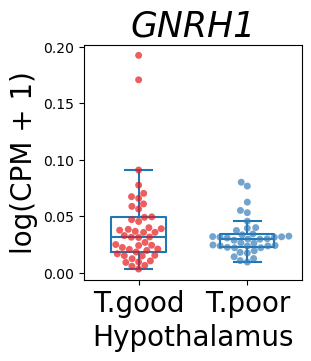

In [41]:
plotGene(myHypothalamus,"Hypothalamus","Cluster","GNRH1")

In [16]:
#plotGene(myHypothalamus,"Hypothalamus","Cluster","TTR")

In [17]:
#plotGene(myHypothalamus,"Hypothalamus","Cluster","AGTR1")

In [18]:
#plotGene(myHypothalamus,"Hypothalamus","Cluster","ANGPTL4")

In [19]:
#plotGene(myHypothalamus,"Hypothalamus","Cluster","EDN1")

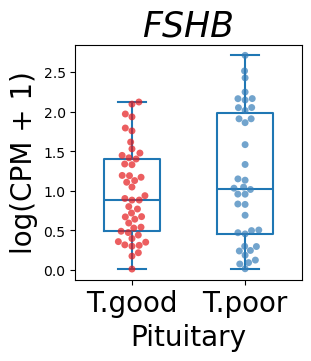

In [42]:
plotGene(myPituitary,"Pituitary","Cluster","FSHB")

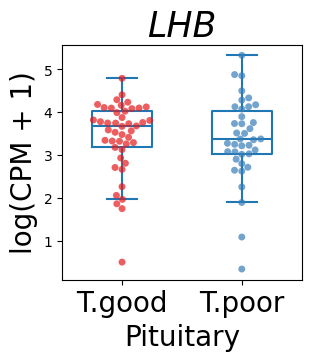

In [43]:
plotGene(myPituitary,"Pituitary","Cluster","LHB")

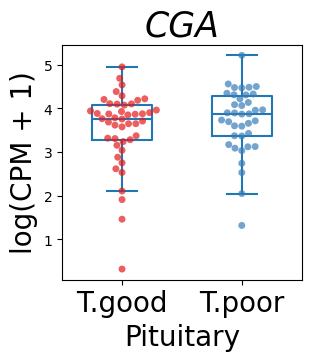

In [44]:
plotGene(myPituitary,"Pituitary","Cluster","CGA")

In [23]:
#plotGene(myPituitary,"Pituitary","Cluster","PEBP4")

In [24]:
len(GroupG_SubjIDs)

45

In [25]:
len(GroupP_SubjIDs)

38

In [26]:
myTissues = ['AnnData_GTEx_v10_Pituitary.h5ad','AnnData_GTEx_v10_Brain - Hypothalamus.h5ad']
myTissues = myTissues + ['AnnData_GTEx_v10_Testis.h5ad']

In [27]:
myFiles={"Pituitary":'AnnData_GTEx_v10_Pituitary.h5ad',
         "Hypothalamus":'AnnData_GTEx_v10_Brain - Hypothalamus.h5ad',
         "Testis":'AnnData_GTEx_v10_Testis.h5ad'}

In [28]:
def searchGenePvalues(Gene):
    myPs = {}
    for t in myFiles.keys():
        f = myFiles[t]
        diff = myTisDiffResults[f]
        p = diff[diff.gene == Gene].pval
        myPs[t] = float(p)

    return myPs
    

In [29]:
myTisAdata = {"Pituitary":myPituitary,
              "Hypothalamus":myHypothalamus,
              "Testis":myTestis}

In [30]:
searchGenePvalues("PEBP4")

/tmp/ipykernel_590/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)


{'Pituitary': 3.264356158341957e-05,
 'Hypothalamus': 0.2667719110085678,
 'Testis': 1.8509085164680462e-05}

In [31]:
def PlotOneGene(Gene,bbox_to_anchor=(0.01, 1)):
    myTisDf = pd.DataFrame(columns=['log(CPM + 1)', 'Group', 'Tissue'])
    for k in myTisAdata.keys():
        The_adataTATB = myTisAdata[k]
        df = pd.DataFrame({
            'log(CPM + 1)': The_adataTATB[:,Gene].X.flatten(),  # 获取基因表达数据
            'Group': The_adataTATB.obs['Cluster'],            # 分组信息
            'Tissue':k
        })
        myTisDf = pd.concat([myTisDf, df], ignore_index=True)

    fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)

    myorder = ["Testis","Hypothalamus","Pituitary"]
    # 绘制箱线图（显示中位数、四分位数等）
    sns.boxplot(
        data=myTisDf,
        x='Tissue', y='log(CPM + 1)', hue='Group',
        order=myorder,
        palette="Set1",
        #width=0.5,
        dodge = 2,
        gap=0.05,
        showfliers=False,
        legend=False,fill=False
    )

    # 绘制点图（显示数据分布）
    sns.stripplot(
        x='Tissue', y='log(CPM + 1)', hue='Group',
        order=myorder,
        palette="Set1",
        data=myTisDf,
        dodge =0.05,
        jitter=0.2, alpha=0.5, size=6
    )
    #加p值
    myPvalues = searchGenePvalues(Gene)
    for k in myorder:
        p_value = myPvalues[k]
        # 添加p值文本
        x_position = list(myorder).index(k)
        myd = myTisDf[myTisDf["Tissue"]==k]
        ymax = myd['log(CPM + 1)'].max()
        if p_value < 0.001:
            ax.text(x_position, ymax*1.05, 
               f"p={p_value:.2e}", 
               ha='center', va='bottom',size=15)
        else:
            ax.text(x_position, ymax*1.05, 
               f"p={p_value:.4f}", 
               ha='center', va='bottom',size=15)

    current_ylim = ax.get_ylim()
    extension_factor = 1.1  # 延长1.5倍
    # 设置新的y轴范围
    ax.set_ylim(current_ylim[0], current_ylim[1]*extension_factor)
    
    # 添加图例和标题
    plt.title(Gene,size=25)
    plt.xlabel('')
    plt.ylabel('log(CPM + 1)',size=20)
    plt.legend(bbox_to_anchor=bbox_to_anchor,
               loc='upper left',
               fontsize='x-large',
               title =None,
               edgecolor="black")
    plt.xticks(rotation=0,size=20)
    plt.tight_layout()
    save_path = "/mnt/h/GTEx/my_plots/Box_Strip_"+Gene+".pdf"
    fig.savefig(save_path, dpi=300,transparent=False)
    plt.show(fig)
    plt.close(fig)

    return myTisDf

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


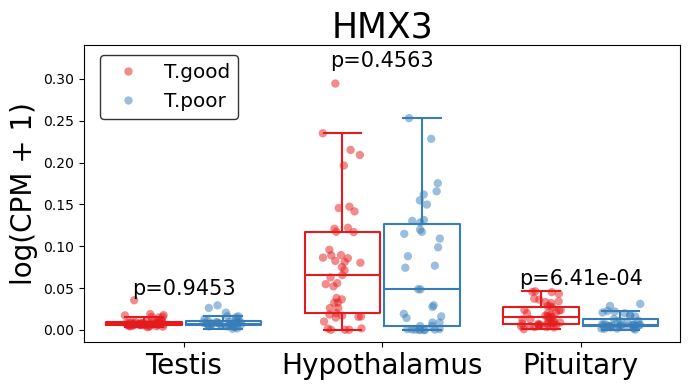

In [36]:
tmp = PlotOneGene("HMX3")

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


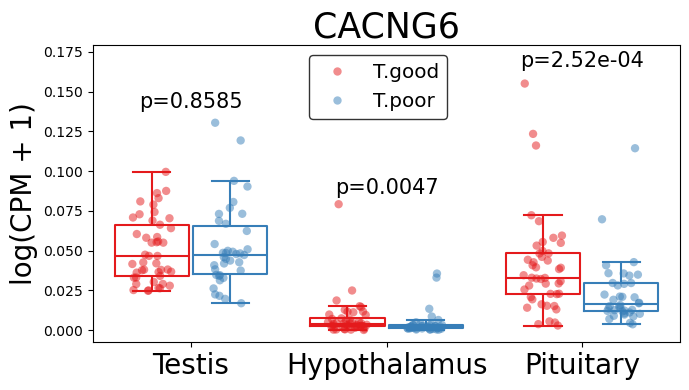

In [39]:
tmp = PlotOneGene("CACNG6",bbox_to_anchor=(0.35, 1))

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


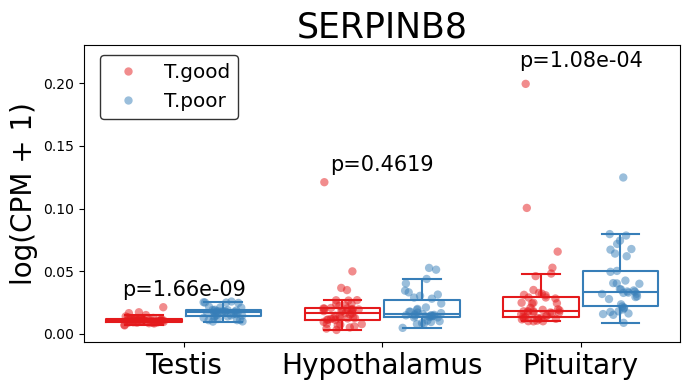

In [41]:
tmp = PlotOneGene("SERPINB8")

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


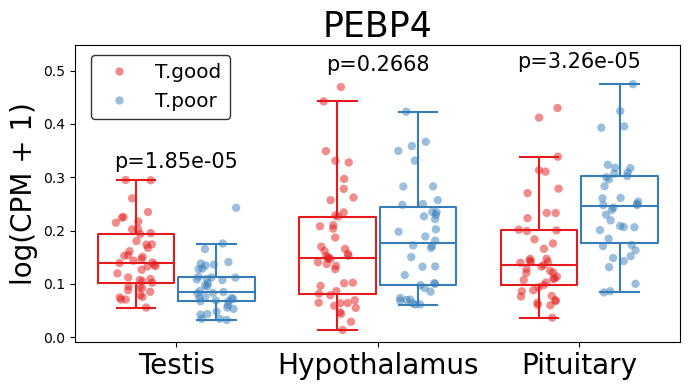

In [42]:
tmp = PlotOneGene("PEBP4")

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


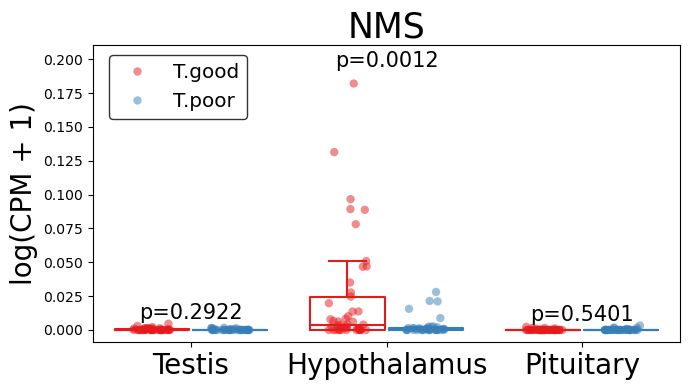

In [43]:
tmp = PlotOneGene("NMS")

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


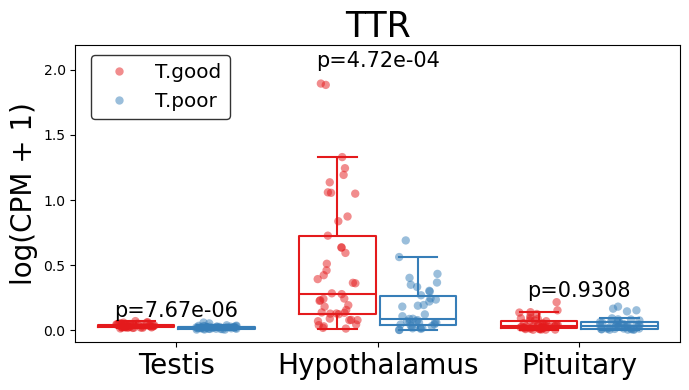

In [44]:
tmp = PlotOneGene("TTR")

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


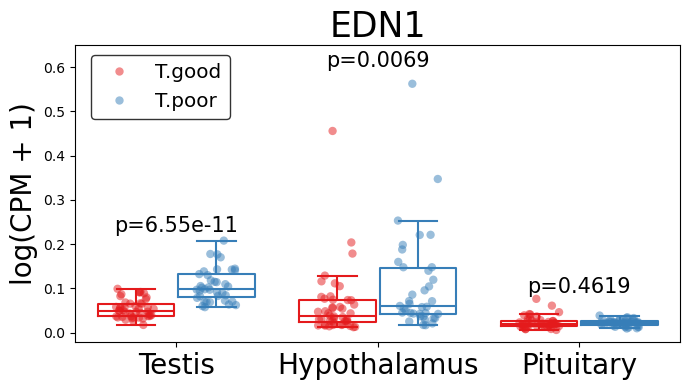

In [45]:
tmp = PlotOneGene("EDN1")

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


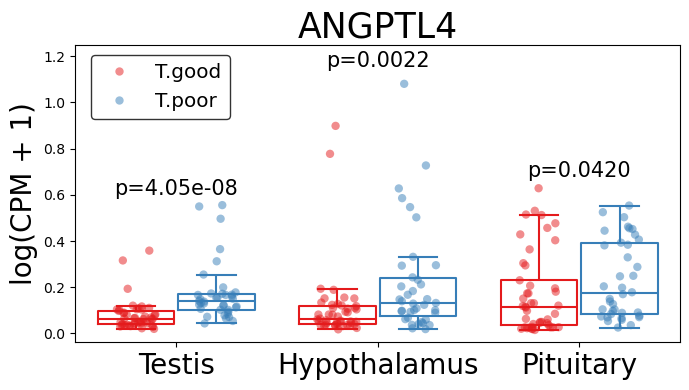

In [46]:
tmp = PlotOneGene("ANGPTL4")

/tmp/ipykernel_6282/2623185379.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_6282/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_6282/2623185379.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


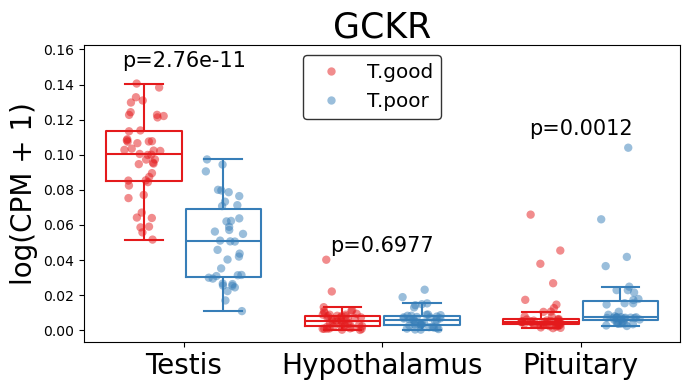

In [53]:
tmp = PlotOneGene("GCKR",bbox_to_anchor=(0.35, 1))